In [3]:
import numpy as np
import scipy.io.wavfile as wav
import FFT

In [2]:
fs, audio = wav.read('PDS.wav')  

if audio.dtype != np.float32:
    audio = audio / np.iinfo(audio.dtype).max

## Eco

In [3]:
atraso = 5000 
atenuacao = 0.6 # volume do eco

eco = np.zeros(atraso + 1)
eco[0] = 1           # som original
eco[atraso] = atenuacao  # eco atrasado

In [4]:
audio_com_eco = FFT.convolucao(audio, eco)

KeyboardInterrupt: 

In [ ]:
# Reescala para int16 se for salvar como WAV padrão
audio_com_eco = np.int16(audio_com_eco / np.max(np.abs(audio_com_eco)) * 32767)
wav.write('audio_com_eco.wav', fs, audio_com_eco)

C:\Users\gson5\AppData\Local\Temp\ipykernel_42976\1629241405.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  audio_com_eco = np.int16(audio_com_eco / np.max(np.abs(audio_com_eco)) * 32767)


## Reverb

In [ ]:
fs_ir, rir = wav.read("1st_baptist_nashville_far_close.wav")
rir = rir.astype(np.float32) / np.max(np.abs(rir))

rir_esquerdo = rir[:,0]
rir_direito = rir[:,1]


C:\Users\gson5\AppData\Local\Temp\ipykernel_42976\698313618.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_ir, rir = wav.read("1st_baptist_nashville_far_close.wav")


In [ ]:
audio_com_reverb = FFT.convolucao(rir_esquerdo, audio)[0:len(audio)]

In [ ]:
# Reescala para int16 se for salvar como WAV padrão
audio_com_reverb = np.int16(audio_com_reverb / np.max(np.abs(audio_com_reverb)) * 32767)
wav.write('audio_com_reverb.wav', fs, audio_com_reverb)

C:\Users\gson5\AppData\Local\Temp\ipykernel_42976\4058220480.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  audio_com_reverb = np.int16(audio_com_reverb / np.max(np.abs(audio_com_reverb)) * 32767)


## Vetor de frequências

$$
\Delta f = \frac{f_s}{N}
$$

Text(0.5, 0, 'f (Hz)')

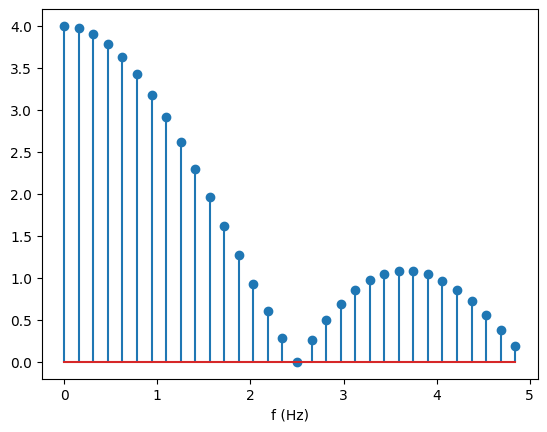

In [ ]:
import matplotlib.pyplot as plt

def frequencia(fs, x_fft):
    N = len(x_fft)
    frequencias = np.zeros(N//2)
    for i in range(N//2):
        frequencias[i] = fs/N * i
    return frequencias

x= [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
x_fft = FFT.fft_completa(x)
frequencias = frequencia(10,x_fft)
plt.stem(frequencias,abs(x_fft)[0:len(x_fft)//2])
plt.xlabel("f (Hz)")